<a href="https://colab.research.google.com/github/Majito0316/Redes-Neuronales/blob/main/Parcial_1_Modo_de_Aprendizaje_y_Recuerdo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1

In [ ]:
# Importar líbrerias
import tensorflow as tf # Tensorflow: Construya y entrena redes neuronales
from tensorflow import keras

# Cargar el dataset MNSIT
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # x_train: Imagenes Entrenamiento (60.000), y_train Etiquetas Entrenamiento; x_test: Imagenes Prueba (10.000), y_test Etiquetas Prueba

# Normalizar los datos (escala de 0 a 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape =(28, 28)), # Capa de entrada
    keras.layers.Dense(128, activation = 'relu'), # Capa Oculta
    keras.layers.Dense(10, activation = 'softmax') # Capa de Salida (10 clases)
])

# Compilar el modelo (modo de aprendizaje)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Entrenar la red neuronal
print("Modo de Aprendizaje: Entrenando la red neuronal...")
model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Modo de Aprendizaje: Entrenando la red neuronal...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8760 - loss: 0.4312 - val_accuracy: 0.9612 - val_loss: 0.1327
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.1168 - val_accuracy: 0.9695 - val_loss: 0.1007
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9762 - loss: 0.0815 - val_accuracy: 0.9755 - val_loss: 0.0793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0554 - val_accuracy: 0.9774 - val_loss: 0.0754
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9878 - loss: 0.0430 - val_accuracy: 0.9777 - val_loss: 0.0773


Cambio 1

In [ ]:
# Entrenar el modelo
model.fit(x_train, y_train, epochs = 3)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0327
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0264
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0206
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0882
Precisión en el conjunto de prueba: 0.9779


Cambio 2

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


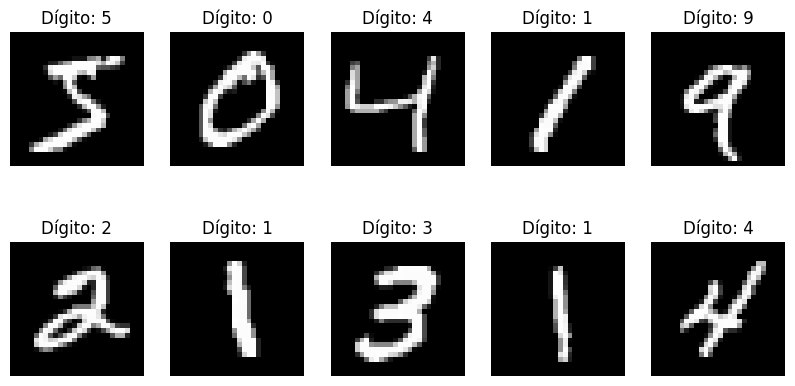

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8834 - loss: 0.4317
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.1193
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9765 - loss: 0.0790
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9710 - loss: 0.0989
Precisión en el conjunto de prueba: 0.9745


In [ ]:
# Importar líbrerias
import tensorflow as tf # Tensorflow: Construye y entrena redes neuronales
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt # Para visualizar las imágenes

# Cargar y preparar el dataset MNSIT
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # x_train: Imagenes Entrenamiento (60.000), y_train Etiquetas Entrenamiento; x_test: Imagenes Prueba (10.000), y_test Etiquetas Prueba

# Normalizar los datos (escala de 0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar algunas imagenes de ejemplo
plt.figure(figsize = (10, 5)) # Tamaño de la figura
for i in range(10): # Mostrar 10 imagenes
    plt.subplot(2, 5, i+1) # Organizar en 2 filas y 5 columnas
    plt.imshow(x_train[i], cmap = 'gray') # Mostrar la imagen en escala de grises
    plt.title(f'Dígito: {y_train[i]}') # Título con la etiqueta real
    plt.axis('off') # Quitar ejes
plt.show () # Mostrar todas la imágenes

# Definir la red neuronal
model = models.Sequential([
    layers.Flatten(input_shape =(28, 28)), # Aplanar las imagenes de 28 * 28 a un vector
    layers.Dense(128, activation = 'relu'), # Capa densa con 128 neuronas
    layers.Dense(10, activation = 'softmax') # Capa de Salida con 10 clases
])

# Compilar el modelo (modo de aprendizaje)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs = 3)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')


Ejercicio 2: Modo de Recuerdo (Inferencia o Predicción)

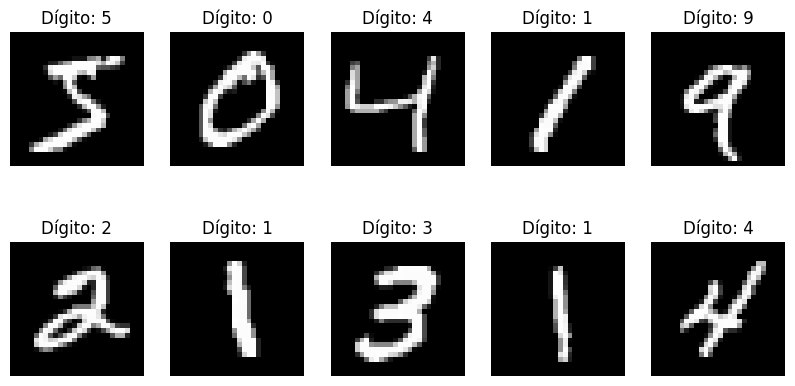

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7772 - loss: 0.6552
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9649 - loss: 0.1162
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9793 - loss: 0.0697
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0871
Precisión en el conjunto de prueba: 0.9804


In [ ]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt  # Para visualizar las imágenes

# Cargar y preparar los datos de MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Mostrar algunas imágenes de ejemplo
plt.figure(figsize=(10, 5))  # Tamaño de la figura
for i in range(10):  # Mostrar 10 imágenes
    plt.subplot(2, 5, i+1)  # Organizar en 2 filas y 5 columnas
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f'Dígito: {y_train[i]}')  # Título con la etiqueta real
    plt.axis('off')  # Quitar ejes
plt.show()  # Mostrar todas las imágenes

# Crear un modelo con memoria (LSTM)
model = models.Sequential([
    layers.Input(shape=(28, 28)),  # 28 pasos de tiempo (filas), 28 características (píxeles x fila)
    layers.LSTM(128, return_sequences=False),  # Capa LSTM con 128 unidades, sin devolver secuencias
    layers.Dense(10, activation='softmax') # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Resumen del modelo
model.summary()

# Entrenar el modelo
model.fit(x_train, y_train, epochs=3)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.4f}')

Ejercicio 3

Entrenando el modelo...
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7226 - loss: 0.8629
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9162 - loss: 0.2858
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9406 - loss: 0.2098

Precisión en el conjunto de prueba: 0.9388


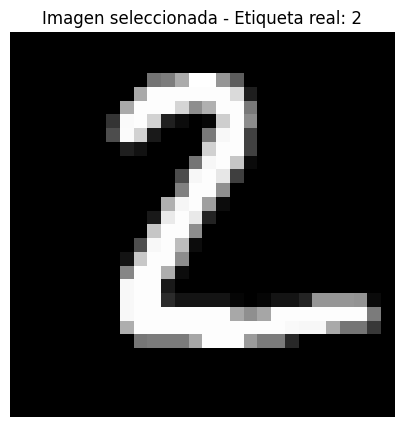


Predicción del modelo: 2
Probabilidades para cada clase:
Clase 0: 0.0003
Clase 1: 0.0140
Clase 2: 0.9604
Clase 3: 0.0132
Clase 4: 0.0001
Clase 5: 0.0005
Clase 6: 0.0028
Clase 7: 0.0000
Clase 8: 0.0087
Clase 9: 0.0000

Etiqueta real: 2
¡El modelo acertó en su predicción!


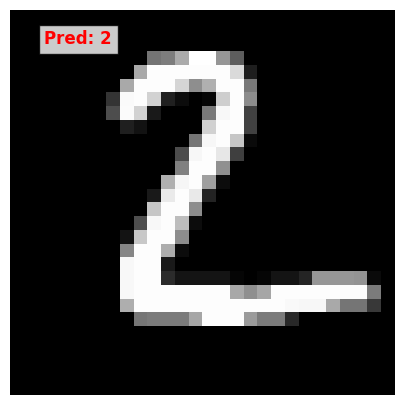

In [6]:
# Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preparar los datos de MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar los datos (valores entre 0 y 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Crear un modelo con memoria simple (SimpleRNN)
model = models.Sequential([
    layers.Input(shape=(28, 28)), # 28 pasos de tiempo (filas), 28 caracteristicas (pixeles por fila)
    layers.SimpleRNN(64), # Capa SimpleRNN con 64 unidades
    layers.Dense(10, activation='softmax') # Capa de salida con 10 clases
])

# Compilar el modelo
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
print("Entrenando el modelo...")
model.fit(x_train, y_train, epochs=3, verbose=1)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nPrecisión en el conjunto de prueba: {test_acc:.4f}")

# Elegir el dígito específico que quieres predecir (0-9)
digito_deseado = 2 # Cambia este numero (0-9) para predecir el dígito que quieras

# Buscar una imagen en x_test que sea el dígito deseado
indice = None
for i in range(len(x_test)):
  if y_test[i] == digito_deseado:
    indice = i
    break

if indice is not None:
  # Seleccionar la imagen y su etiqueta real
  imagen_prueba = x_test[indice]
  etiqueta_real = y_test[indice]

  # Mostrar la imagen seleccionada
  plt.figure(figsize=(5,5))
  plt.imshow(imagen_prueba, cmap='gray')
  plt.title(f'Imagen seleccionada - Etiqueta real: {etiqueta_real}')
  plt.axis('off')
  plt.show()

  # Realizar la predicción
  imagen_prueba_reshape = np.expand_dims(imagen_prueba, axis=0)
  prediccion = model.predict(imagen_prueba_reshape, verbose=0)
  digito_predicho = np.argmax(prediccion)

  # Mostrar la predicción y probabilidades
  print(f"\nPredicción del modelo: {digito_predicho}")
  print("Probabilidades para cada clase:")
  for i, prob in enumerate(prediccion[0]):
    print(f"Clase {i}: {prob:.4f}")

  # Comparar el resultado con la etiqueta real
  print(f"\nEtiqueta real: {etiqueta_real}")
  if digito_predicho == etiqueta_real:
    print("¡El modelo acertó en su predicción!")
  else:
    print("El modelo no acertó en su predicción")

  # Visualización final con predicción y real
  plt.figure(figsize=(5,5))
  plt.imshow(imagen_prueba, cmap='gray')
  plt.text(2, 2, f'Pred: {digito_predicho}', color='red', fontsize=12, weight='bold',
           bbox=dict(facecolor='white', alpha=0.8))
  plt.axis('off')
  plt.show()
else:
  print(f"No se encontró ninguna imagen con el digito {digito_deseado} en el conjuntode prueba.")